In [1]:
#Example notebook: waveform plotting and annotation

In [2]:
# Imports.
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal

In [3]:
# Location of example 'sample' data directory.
DATA_DIR=os.path.join('..', 'sample\\BA2001\\BA2001_1_1')

In [4]:
# Load ECG and PPG raw waveform file
data = pd.read_csv(os.path.join(DATA_DIR,'ppg_ecg.csv'))
t_ecgppg = data['DIFFERENTIAL_TIME'].to_numpy() # Relative time of ECG and PPG waveforms
ecg, ppgcir = data['ECG'].to_numpy(),data['PPGCIR'].to_numpy()

In [5]:
# Load PPW raw waveform file
data = pd.read_csv(os.path.join(DATA_DIR,'ppw.csv'))
t_ppw = data['DIFFERENTIAL_TIME'].to_numpy() # Relative time of PPW waveforms
ppw = data['PPW'].to_numpy()

In [6]:
# The sampling rate of both ECG and PPG waveforms is 1000 Hz
fs_ecgppg = 1000
# The sampling rate of the PPW waveform is 200 Hz
fs_ppw = 200

In [7]:
# time alignment
t_ppw = t_ppw - t_ecgppg[0]
t_ecgppg = t_ecgppg - t_ecgppg[0]

In [8]:
# Define bandpass filtering function.
def _bandpass_filter(data: np.ndarray, hp: float, lp: float, fs: float) -> np.ndarray:
    order = 4
    b, a = signal.butter(order, (hp, lp), btype='bandpass', fs=fs)
    return signal.lfilter(b, a, data-data[0])

Text(0, 0.5, 'PPW (AU)')

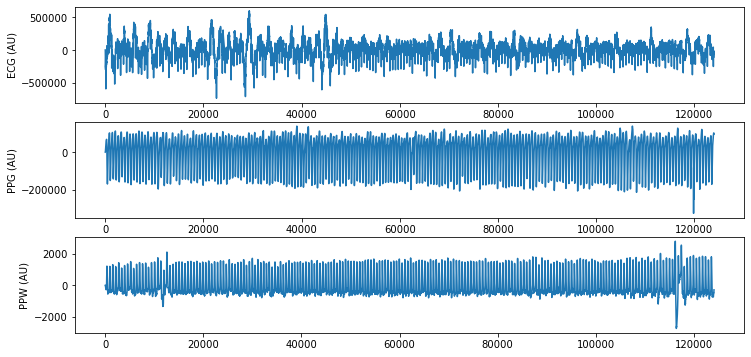

In [9]:
# Plot ECG, PPG, and PPW waveforms.

plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
ecg = _bandpass_filter(ecg, 0.5, 40, fs_ecgppg)
plt.plot(t_ecgppg,ecg)
plt.ylabel('ECG (AU)')

plt.subplot(3,1,2)
ppgcir = _bandpass_filter(ppgcir, 0.5, 20, fs_ecgppg)
plt.plot(t_ecgppg,ppgcir)
plt.ylabel('PPG (AU)')

plt.subplot(3,1,3)
ppw = _bandpass_filter(ppw, 0.5, 20, fs_ppw)
plt.plot(t_ppw,ppw)
plt.ylabel('PPW (AU)')

In [10]:
# Load description file
data = pd.read_csv(os.path.join(DATA_DIR,'desc.csv'))

In [11]:
print('age: %d years, gender: %s, hight: %.2f cm, weight: %.2f kg, dual-observer auscultation BP: %s mmHg'%
      (data['age'],data['gender'].to_numpy(),data['hight'],data['weight'],data['BP values'].to_numpy()))

# There are four blood pressure values, i.e., SBPpre, DBPpre, SBPpre, DBPpost
# You can use (SBPpre+SBPpre)/2 and (DBPpre+DBPpre)/2 as the finally reference BPs

age: 56 years, gender: ['female'], hight: 155.00 cm, weight: 53.30 kg, dual-observer auscultation BP: ['70  89  70  94'] mmHg
